## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv("Pokemon_dibimbing.csv")

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.shape

(800, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


From inspection of the data above, it can be seen that column **_Type 2_** has _null value_

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


## Eksploratory Data Analysis

### How many pokemons are there per Generation?

Generation is a collection of Pokemon types based on the game.

In [6]:
df['Generation'].value_counts(sort=True)

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

<ipython-input-7-e96cdf173337>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Generation'], palette='Greens_r', order=df['Generation'].value_counts().index)


<Axes: xlabel='Generation', ylabel='count'>

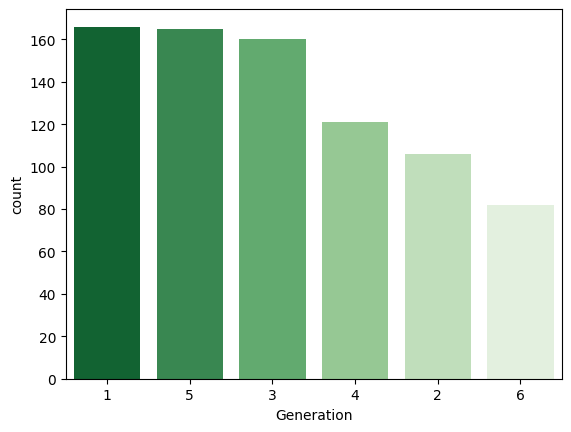

In [7]:
sns.countplot(x=df['Generation'], palette='Greens_r', order=df['Generation'].value_counts().index)

The generation with the most is the 1st generation with 166 Pokemons.<br>
The generation with the fewest is the 6th generation with 82 Pokemons.

### How is the pokemon percentage by Legendary label?

In [8]:
print("Banyaknya pokemon legendaris ialah: {0}".format(len(df[df['Legendary'] == True])))
print("Banyaknya pokemon non-legendaris ialah: {0}".format(len(df[df['Legendary'] == False])))

Banyaknya pokemon legendaris ialah: 65
Banyaknya pokemon non-legendaris ialah: 735


In [9]:
pastel= ['#c4e9b2','#f5da59']

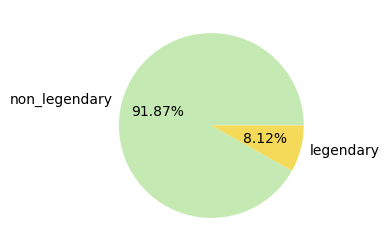

In [10]:
plt.figure(figsize=(3,3))
plt.pie(x=df['Legendary'].value_counts(),autopct='%0.2f%%',labels=['non_legendary','legendary'],colors=pastel)
plt.show()

In [11]:
#df[df['Legendary'] == True]['Generation'].value_counts(sort=False)

In [12]:
#df[df['Legendary'] == False]['Generation'].value_counts(sort=False)

The distribution of total pokemons by Legendary

In [13]:
pd.pivot_table(df, index='Generation', columns='Legendary', values=['Name'], aggfunc={'Name' : 'count'}, fill_value=0)

Name      
Legendary  False True 
Generation            
1            160     6
2            101     5
3            142    18
4            108    13
5            150    15
6             74     8

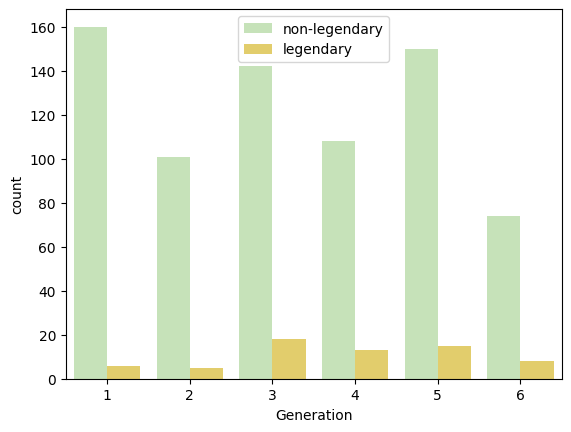

In [14]:
sns.countplot(x='Generation',data=df,hue=df['Legendary'],palette=pastel)
plt.legend(['non-legendary','legendary'])

From the distribution of **Legendary Pokemon** that has been shown, the 3rd generation has the largest number of legendary Pokemon, namely 18 Pokemon. Meanwhile, the 2nd generation has the smallest number of Pokemon, namely 5 Pokemon.<br><br>
From the distribution of **non-Legendary Pokemon** that has been shown, the 1st generation has the largest number of legendary Pokemon, namely 160 Pokemon. Meanwhile, the 6th generation has the smallest number of Pokemon, namely 74 Pokemon.<br>

### The distribution of total base statistics can be seen in the output below.

The following is statistical data on the _Total_ variable:

In [15]:
df['Total'].describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64

In [16]:
df.groupby(['Generation'])[['Total']].mean()

,Total
Generation,
1,426.813253
2,418.283019
3,436.225000
4,459.016529
5,434.987879
6,436.378049


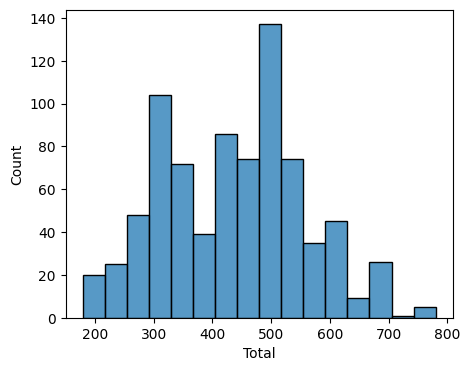

In [17]:
fig,ax = plt.subplots(figsize=(5,4))
sns.histplot(data=df['Total'], ax=ax)
plt.show()

### Which pokemons are the strongest and the weakest of all?

To find it, use the _Total_ variable in the dataset.

In [18]:
print("Pokemon terkuat adalah: ")
df[df['Total'] == df['Total'].max()][['Name', 'Total', 'Type 1', 'Type 2', 'Generation', 'Legendary']]

Pokemon terkuat adalah: 


,Name,Total,Type 1,Type 2,Generation,Legendary
163,MewtwoMega Mewtwo X,780,Psychic,Fighting,1,True
164,MewtwoMega Mewtwo Y,780,Psychic,NaN,1,True
426,RayquazaMega Rayquaza,780,Dragon,Flying,3,True


There are 3 **_Legendary_** pokemon that have the greatest total strength, including MewtwoMega Mewtwo X, MewtwoMega Mewtwo y, and RayquazaMega Rayquaza. Each has the same total of 780.

In [19]:
print("Pokemon terlemah adalah : ")
df[df['Total'] == df['Total'].min()][['Name', 'Total', 'Type 1', 'Type 2','Generation', 'Legendary']]

Pokemon terlemah adalah : 


,Name,Total,Type 1,Type 2,Generation,Legendary
206,Sunkern,180,Grass,NaN,2,False


The smallest total strength Pokemon is a **non Legendary** Pokemon named Sunkern, which is 180.

### What is pokemon with the strongest base stats for each stats indicator?

Several Pokemon have been obtained that represent the greatest stats for each indicator of stats.

In [20]:
#df['Type 2'] = df['Type 2'].fillna("Unknown")

In [21]:
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stats:
    print("Stats {0} terkecil : ".format(stat))
    display(df[df[stat] == df[stat].min()][['Name', stat, 'Type 1', 'Type 2']])
    print("")

Stats HP terkecil : 


,Name,HP,Type 1,Type 2
316,Shedinja,1,Bug,Ghost



Stats Attack terkecil : 


,Name,Attack,Type 1,Type 2
121,Chansey,5,Normal,NaN
488,Happiny,5,Normal,NaN



Stats Defense terkecil : 


,Name,Defense,Type 1,Type 2
121,Chansey,5,Normal,NaN
488,Happiny,5,Normal,NaN



Stats Sp. Atk terkecil : 


,Name,Sp. Atk,Type 1,Type 2
230,Shuckle,10,Bug,Rock
381,Feebas,10,Water,NaN
486,Bonsly,10,Rock,NaN



Stats Sp. Def terkecil : 


,Name,Sp. Def,Type 1,Type 2
13,Caterpie,20,Bug,NaN
16,Weedle,20,Bug,Poison
139,Magikarp,20,Water,NaN
188,Igglybuff,20,Normal,Fairy
347,Carvanha,20,Water,Dark
429,DeoxysAttack Forme,20,Psychic,NaN



Stats Speed terkecil : 


,Name,Speed,Type 1,Type 2
230,Shuckle,5,Bug,Rock
495,Munchlax,5,Normal,NaN


In [22]:
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stats:
    print("Stats {0} terbesar: ".format(stat))
    display(df[df[stat] == df[stat].max()][['Name', stat, 'Type 1', 'Type 2']])
    print("")

Stats HP terbesar: 


,Name,HP,Type 1,Type 2
261,Blissey,255,Normal,NaN



Stats Attack terbesar: 


,Name,Attack,Type 1,Type 2
163,MewtwoMega Mewtwo X,190,Psychic,Fighting



Stats Defense terbesar: 


,Name,Defense,Type 1,Type 2
224,SteelixMega Steelix,230,Steel,Ground
230,Shuckle,230,Bug,Rock
333,AggronMega Aggron,230,Steel,NaN



Stats Sp. Atk terbesar: 


,Name,Sp. Atk,Type 1,Type 2
164,MewtwoMega Mewtwo Y,194,Psychic,NaN



Stats Sp. Def terbesar: 


,Name,Sp. Def,Type 1,Type 2
230,Shuckle,230,Bug,Rock



Stats Speed terbesar: 


,Name,Speed,Type 1,Type 2
431,DeoxysSpeed Forme,180,Psychic,NaN


Several Pokemon have been obtained that represent the greatest stats for each type of stats. To get a clearer picture, the average of each statistic can be found and then visualized with a bar plot.

In [23]:
df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

HP         69.25875
Attack     79.00125
Defense    73.84250
Sp. Atk    72.82000
Sp. Def    71.90250
Speed      68.27750
dtype: float64

<Axes: >

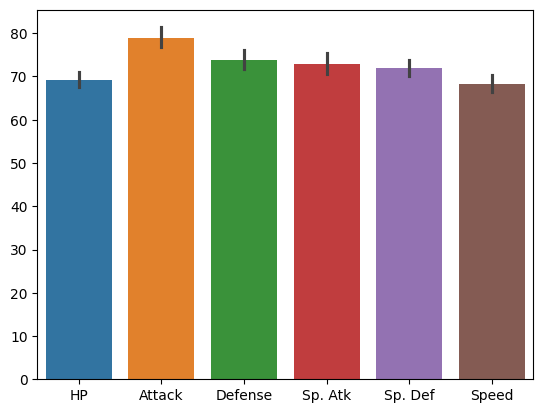

In [24]:
sns.barplot(data=df[stats])

The average value for each statistic is in the range of 70 to 80. The Pokemon that represents the highest stats has stats that are almost double the average stats for each category.

### What is the percentage of the evolved pokemon?

In [25]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [26]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [27]:
evolved=df['Type 2'].isnull().value_counts()
evolved

Type 2
False    414
True     386
Name: count, dtype: int64

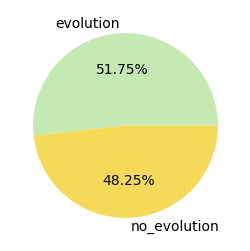

In [28]:
plt.figure(figsize=(3,3))
plt.pie(evolved,autopct='%0.2f%%',labels=['evolution','no_evolution'],colors=pastel)
#plt.title('Percentage of Pokemon Evolution')
plt.show()

If the secondary type is empty then it means the pokemon has not evolved. There are 414 pokemons can evolve or about 51% of total pokemons.

### How many numbers of pokemon by the primary type?

Top 5 primary types of pokemon.

In [29]:
top_type1= df['Type 1'].value_counts().head(5)
top_type1

Type 1
Water      112
Normal      98
Grass       70
Bug         69
Psychic     57
Name: count, dtype: int64

<Axes: xlabel='Type 1'>

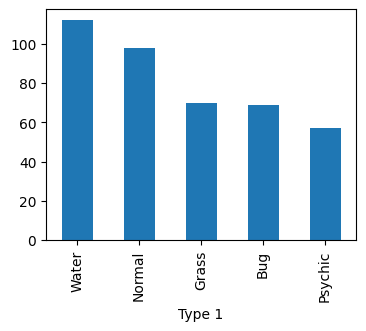

In [30]:
top_type1.plot(kind='bar', figsize=(4,3))

In [31]:
df[df['Type 1'] == 'Water'][['Total']].max()

Total    770
dtype: int64

In [32]:
df[df['Type 1'] == 'Water'][['Type 2']].value_counts(sort=True, dropna=False)

Type 2  
NaN         59
Ground      10
Flying       7
Dark         6
Psychic      5
Rock         4
Fighting     3
Grass        3
Ice          3
Poison       3
Dragon       2
Electric     2
Fairy        2
Ghost        2
Steel        1
Name: count, dtype: int64

Most of pokemon's primary type is **_Water_** and 59 of 112 or over 50% they do not undergo transformation.

The following table is the number of pokemon primary types for each generation.

In [33]:
pd.pivot_table(df, index='Generation', columns='Type 1', values=['Name'], aggfunc={'Name' : 'count'}, fill_value=0)

Name                                                              \
Type 1      Bug Dark Dragon Electric Fairy Fighting Fire Flying Ghost Grass   
Generation                                                                    
1            14    0      3        9     2        7   14      0     4    13   
2            12    6      0        7     5        2    8      0     1     9   
3            12    6     12        5     0        5    8      0     5    13   
4            10    3      4       12     1        3    5      0     7    15   
5            18   13      9        8     0        7    9      2     5    15   
6             3    3      4        3     9        3    8      2    10     5   

                                                              
Type 1     Ground Ice Normal Poison Psychic Rock Steel Water  
Generation                                                    
1               8   2     24     14      11   10     0    31  
2               3   4     15      1       7    5     3    18  
3               7   7     18      3      12    8    12    27  
4               4   3     18      6       8    6     3    13  
5              10   6     19      2      14    6     4    18  
6               0   2      4      2       5    9     5     5

Generation 1 has the most Water types, which is 31<br>
Generation 2 has the most Water types, which is 18<br>
Generation 3 has the most Water types, which is 27<br>
Generation 4 has the most Normal types, which is 18<br>
Generation 5 has the most Normal types, which is 19<br>
Generation 6 has the most Ghost types, which is 10

### What is the most powerful type combination?

We are looking for minimum total strength, why minimum? Because the greater the total value, the more counter attacks the Pokemon will have.

In [34]:
df['Type 2'] = df['Type 2'].fillna("Unknown")

In [35]:
weakest = []
for i in range(len(df['Generation'])):
    df_by_generation = df[df['Generation'] == i]
    weakest.append(df_by_generation[df_by_generation['Total'] == df_by_generation['Total'].min()][['Name', 'Total', 'Generation', 'Type 1', 'Type 2']])

print("Pokemon terlemah pada tiap generasi: ")
pd.concat(weakest, axis=0)

Pokemon terlemah pada tiap generasi: 


,Name,Total,Generation,Type 1,Type 2
13,Caterpie,195,1,Bug,Unknown
16,Weedle,195,1,Bug,Poison
206,Sunkern,180,2,Grass,Unknown
322,Azurill,190,3,Normal,Fairy
446,Kricketot,194,4,Bug,Unknown
563,Patrat,255,5,Normal,Unknown
732,Scatterbug,200,6,Bug,Unknown


From this it can be concluded that the **_bug/grass/normal and poison/fairy_** types are the weakest combination so far.

In [36]:
strongest = []
for i in range(len(df['Generation'])):
    df_by_generation = df[df['Generation'] == i]
    strongest.append(df_by_generation[df_by_generation['Total'] == df_by_generation['Total'].max()][['Name', 'Total', 'Generation', 'Type 1', 'Type 2']])

print("Pokemon terkuat pada tiap generasi: ")
pd.concat(strongest, axis=0)

Pokemon terkuat pada tiap generasi: 


,Name,Total,Generation,Type 1,Type 2
163,MewtwoMega Mewtwo X,780,1,Psychic,Fighting
164,MewtwoMega Mewtwo Y,780,1,Psychic,Unknown
268,TyranitarMega Tyranitar,700,2,Rock,Dark
426,RayquazaMega Rayquaza,780,3,Dragon,Flying
552,Arceus,720,4,Normal,Unknown
711,KyuremBlack Kyurem,700,5,Dragon,Ice
712,KyuremWhite Kyurem,700,5,Dragon,Ice
796,DiancieMega Diancie,700,6,Rock,Fairy


From this it can be concluded that the **_psychic/dragon of Type 1 and fighting/flying of Type 2_** are the most effective type combination so far.

Here are the top 10 rankings of the strongest Pokemon type combinations.

In [37]:
df[['Total', 'Type 1', 'Type 2']].drop_duplicates().sort_values(['Total'], ascending=False).head(10)

,Total,Type 1,Type 2
163,780,Psychic,Fighting
164,780,Psychic,Unknown
426,780,Dragon,Flying
422,770,Water,Unknown
424,770,Ground,Fire
552,720,Normal,Unknown
409,700,Dragon,Flying
268,700,Rock,Dark
796,700,Rock,Fairy
413,700,Steel,Psychic


<Axes: xlabel='type_merged'>

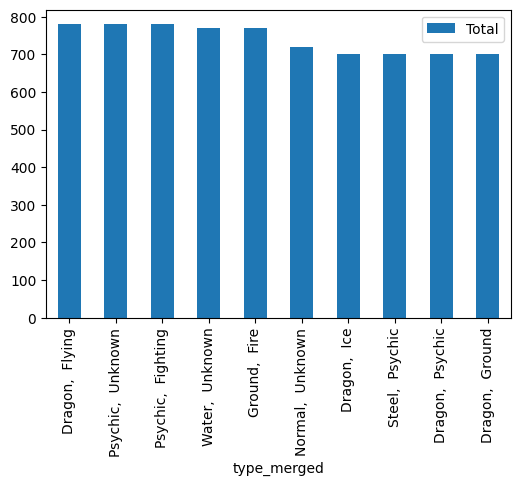

In [38]:
df['type_merged'] = df['Type 1'] + ",  " + df['Type 2']

df[['Total', 'type_merged']].sort_values(['Total'], ascending=False) \
.drop_duplicates(['type_merged']).head(10).plot.bar(x='type_merged', y='Total', figsize=(6, 4))

### What are the strongest legendary and non-legendary Pokemon of each generation?

In [39]:
df_nonlegendary = df[df['Legendary'] == False]

In [40]:
df_legendary = df[df['Legendary'] == True]

In [41]:
strongest = []
for i in range(len(df['Generation'])):
    df_by_generation = df_legendary[df_legendary['Generation'] == i]
    strongest.append(df_by_generation[df_by_generation['Total'] == df_by_generation['Total'].max()][['Legendary', 'Generation','Total','Name']])

print("Pokemon legendaris terkuat pada tiap generasi: ")
pd.concat(strongest, axis=0)

Pokemon legendaris terkuat pada tiap generasi: 


,Legendary,Generation,Total,Name
163,True,1,780,MewtwoMega Mewtwo X
164,True,1,780,MewtwoMega Mewtwo Y
269,True,2,680,Lugia
270,True,2,680,Ho-oh
426,True,3,780,RayquazaMega Rayquaza
552,True,4,720,Arceus
711,True,5,700,KyuremBlack Kyurem
712,True,5,700,KyuremWhite Kyurem
796,True,6,700,DiancieMega Diancie


In [42]:
strongest = []
for i in range(len(df['Generation'])):
    df_by_generation = df_nonlegendary[df_nonlegendary['Generation'] == i]
    strongest.append(df_by_generation[df_by_generation['Total'] == df_by_generation['Total'].max()][['Legendary', 'Generation','Total','Name']])

print("Pokemon nonlegendaris terkuat pada tiap generasi: ")
pd.concat(strongest, axis=0)

Pokemon nonlegendaris terkuat pada tiap generasi: 


,Legendary,Generation,Total,Name
141,False,1,640,GyaradosMega Gyarados
268,False,2,700,TyranitarMega Tyranitar
409,False,3,700,SalamenceMega Salamence
413,False,3,700,MetagrossMega Metagross
494,False,4,700,GarchompMega Garchomp
696,False,5,600,Hydreigon
715,False,5,600,MeloettaAria Forme
716,False,5,600,MeloettaPirouette Forme
717,False,5,600,Genesect
776,False,6,600,Goodra


In [43]:
#df_pivot_nl=pd.pivot_table(df_nonlegendary, index=['Generation','Legendary'], values=['Total', 'Name'], aggfunc={'Total' : np.max, 'Name' : lambda x: ','.join(str(v) for v in x)}, fill_value=0)
#df_pivot_nl

In [44]:
#df_pivot_l=pd.pivot_table(df_legendary, index=['Generation','Legendary'], values=['Total', 'Name'], aggfunc={'Total' : np.max, 'Name' : lambda x: ','.join(str(v) for v in x)}, fill_value=0)
#df_pivot_l

In [45]:
#pd.pivot_table(df, index='Generation',columns='Legendary',values='Total',aggfunc={'Total' : 'max'},fill_value=0)

In [46]:
#pd.pivot_table(df, index=['Legendary','Generation'],columns='Total',values='Name', aggfunc=', '.join,fill_value=0)

### What power does an evolved Pokemon have?

In [47]:
df['cek_evolusi'] = np.where(df['Type 2']=='Unknown', 0, 1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type_merged,cek_evolusi
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,"Grass, Poison",1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,"Grass, Poison",1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,"Grass, Poison",1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,"Grass, Poison",1
4,4,Charmander,Fire,Unknown,309,39,52,43,60,50,65,1,False,"Fire, Unknown",0


In [48]:
df.groupby(['cek_evolusi'])[['Total']].mean()

,Total
cek_evolusi,
0,412.015544
1,456.628019


Evolved Pokemons have an average power of 450, higher than non-evolved ones.

In [49]:
df['is_water']=np.where(df['Type 1']=='Water', 1, 0)
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type_merged,cek_evolusi,is_water
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,"Rock, Fairy",1,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,"Rock, Fairy",1,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,"Psychic, Ghost",1,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,"Psychic, Dark",1,0
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,"Fire, Water",1,0


In [50]:
df.query("is_water==1").groupby(["Type 2"])["Total"].max().sort_values(ascending=False)

Type 2
Unknown     770
Dragon      680
Dark        640
Ground      635
Psychic     590
Fighting    580
Flying      540
Ice         535
Steel       530
Poison      515
Rock        495
Ghost       480
Grass       480
Electric    460
Fairy       420
Name: Total, dtype: int64

**_Water_** type's highest total is 770 without evolving.

In [51]:
df.query("is_water==1 & cek_evolusi==1").groupby(["Type 2"])["Total"].mean().sort_values(ascending=False)

Type 2
Dragon      610.000000
Fighting    556.666667
Steel       530.000000
Ice         511.666667
Dark        493.833333
Psychic     481.000000
Ground      433.900000
Rock        428.750000
Poison      426.666667
Ghost       407.500000
Flying      404.000000
Electric    395.000000
Grass       346.666667
Fairy       335.000000
Name: Total, dtype: float64

Evolution from water to dragon requires an average total 610. The smalest average 335  is required water to be fairy.

### How is the correlation between variables?

In [52]:
#df['Legendary'] = np.where(df['Legendary'] == False, 0, 1)

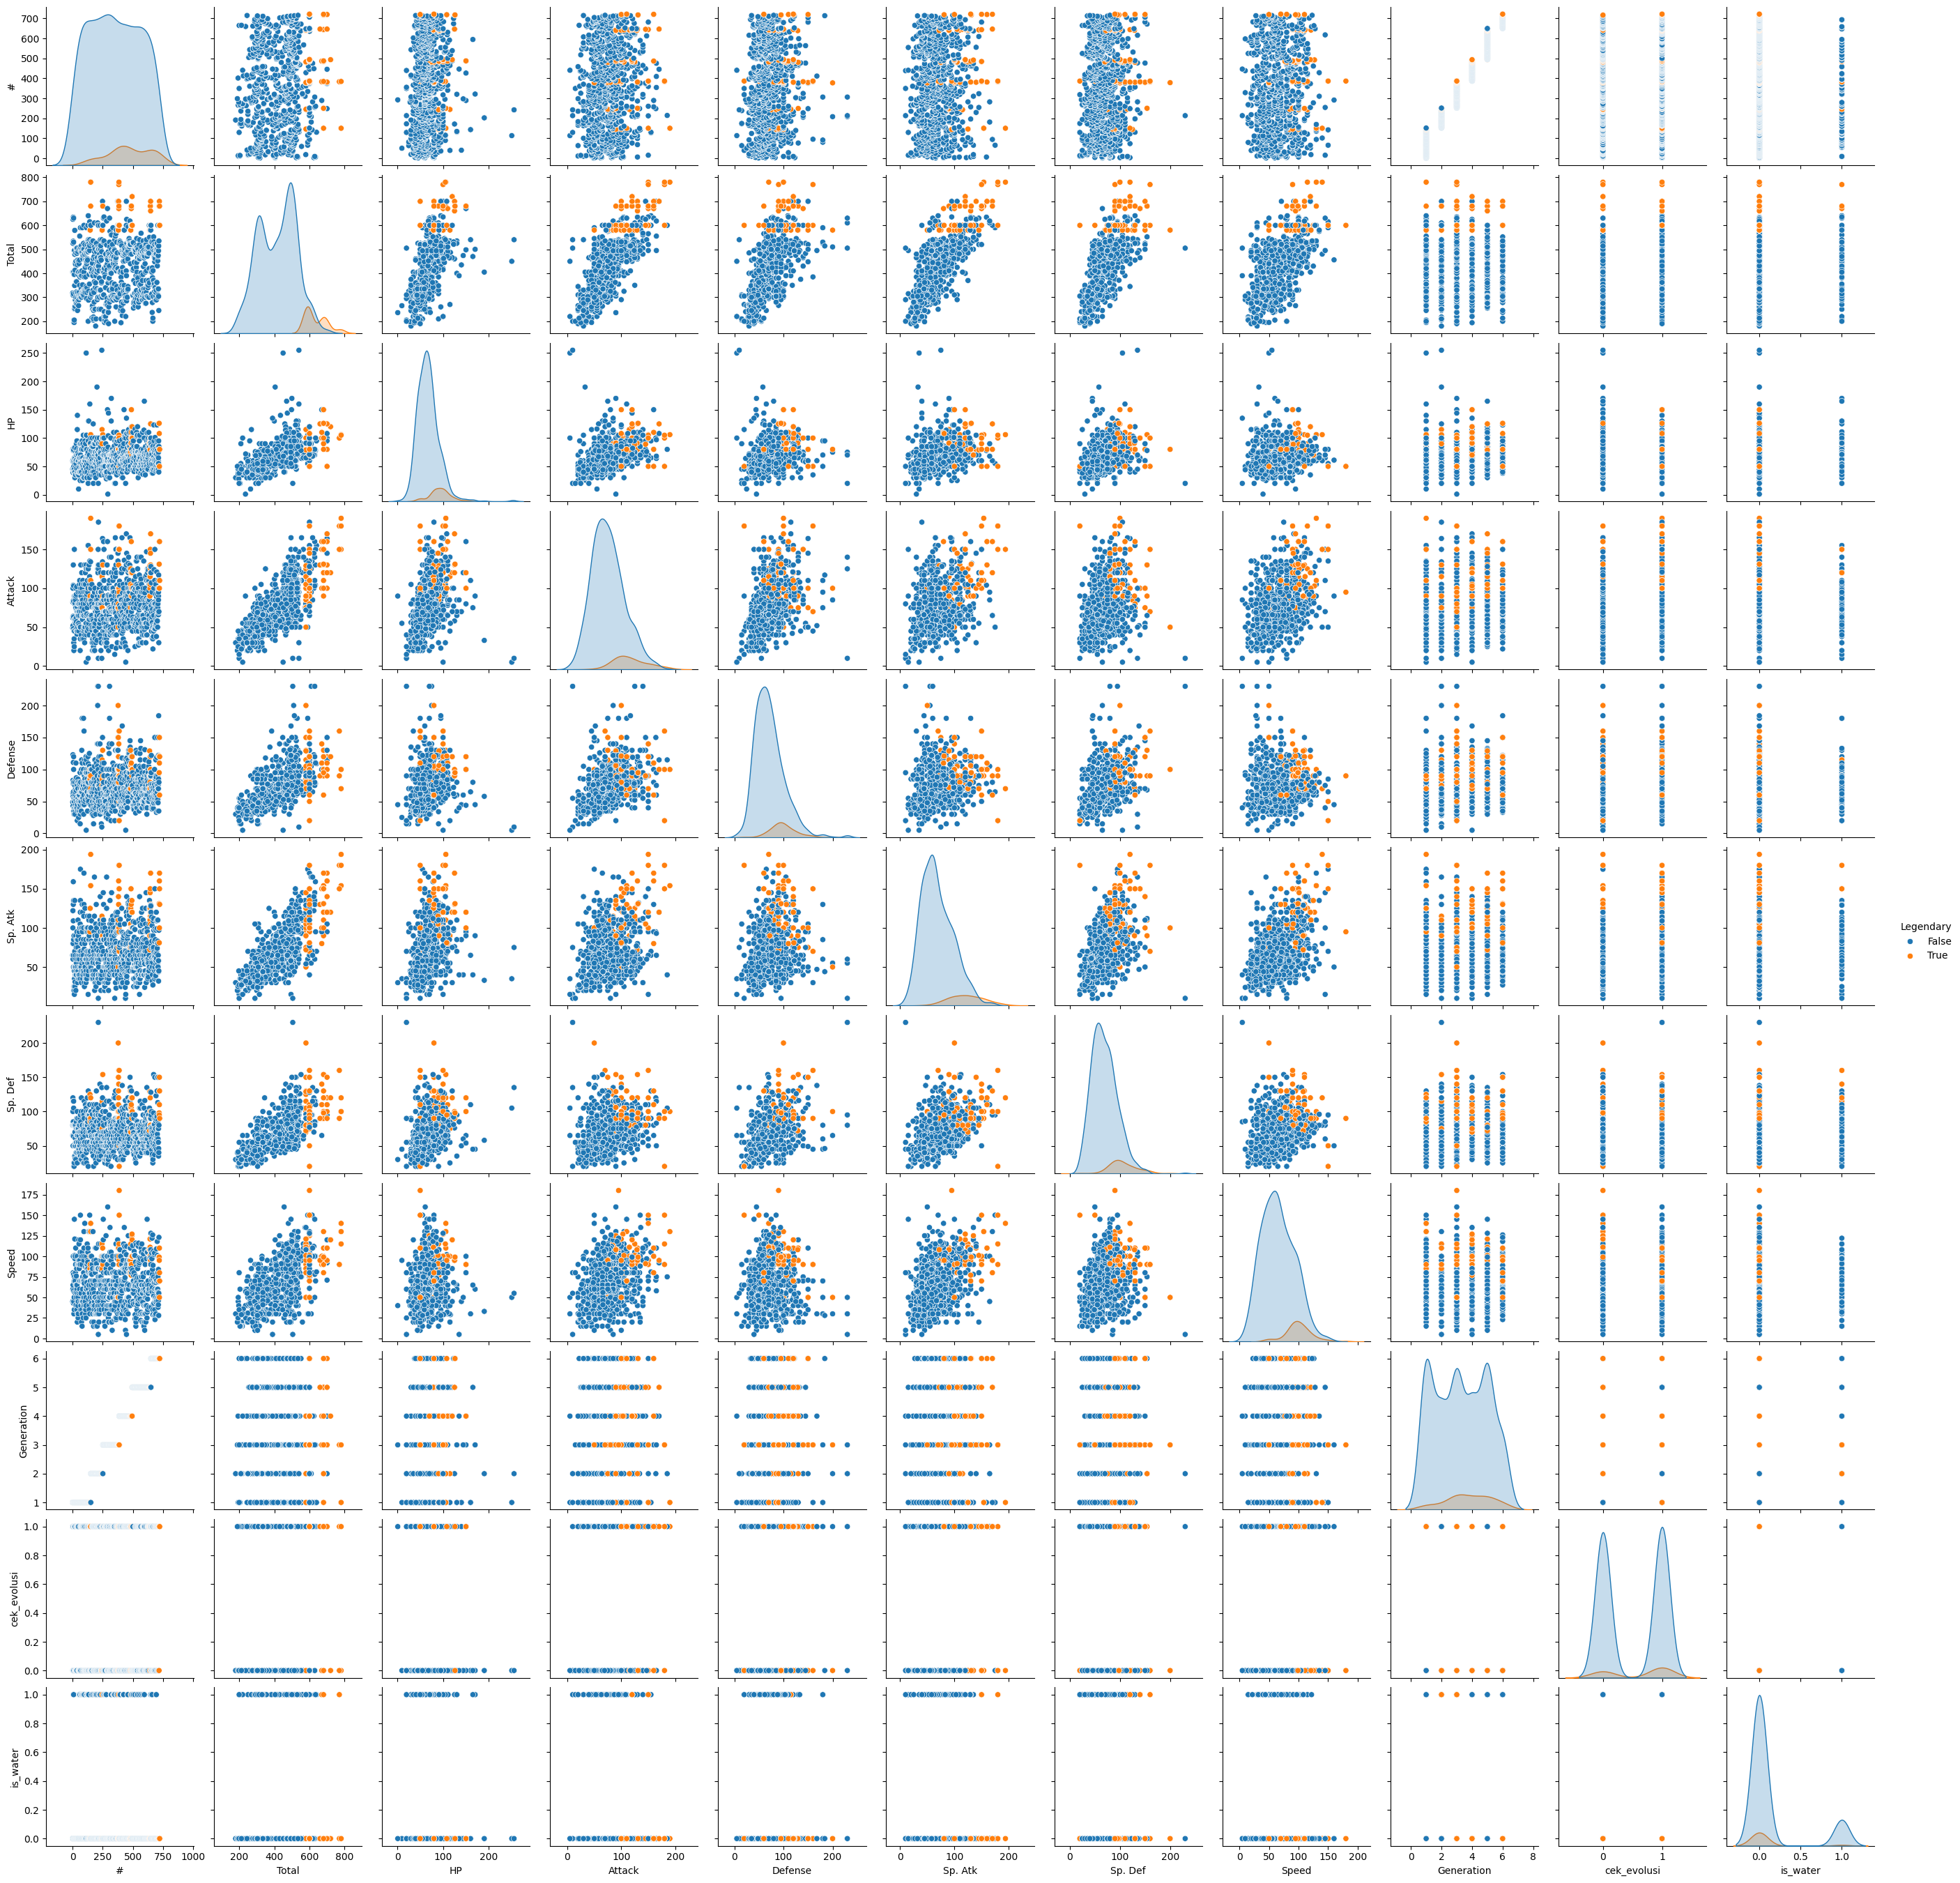

In [53]:
#sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']]) #, hue='Legendary'
sns.pairplot(df,hue='Legendary')

In [54]:
dict_type = {'Bug' : 1, 'Dark' : 2, 'Dragon' : 3, 'Electric' : 4, 'Fairy' : 5, 'Fighting' : 6, 'Fire' : 7, 'Flying' : 8,\
        'Ghost' : 9, 'Grass' : 10, 'Ground' : 11, 'Ice' : 12, 'Normal' : 13, 'Poison' : 14, 'Psychic' : 15, 'Rock' : 16, 'Steel' : 17, 'Water' : 18, 'Unknown' : 0}
dict_legend = {False : 0, True : 1}
df['Type 1'] = df['Type 1'].map(dict_type)

In [55]:
df['Type 2'] = df['Type 2'].map(dict_type)

In [56]:
df['Legendary'] = df['Legendary'].map(dict_legend)

In [57]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type_merged,cek_evolusi,is_water
0,1,Bulbasaur,10,14,318,45,49,49,65,65,45,1,0,"Grass, Poison",1,0
1,2,Ivysaur,10,14,405,60,62,63,80,80,60,1,0,"Grass, Poison",1,0
2,3,Venusaur,10,14,525,80,82,83,100,100,80,1,0,"Grass, Poison",1,0
3,3,VenusaurMega Venusaur,10,14,625,80,100,123,122,120,80,1,0,"Grass, Poison",1,0
4,4,Charmander,7,0,309,39,52,43,60,50,65,1,0,"Fire, Unknown",0,0


In [60]:
corr_matrix =df[['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']].corr()

In [61]:
corr_matrix

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,1.000000,-0.092479,0.023251,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,-0.010162
Type 2,-0.092479,1.000000,0.120042,0.002905,0.054590,0.233622,0.081794,0.120315,-0.025989,-0.009095,0.010674
Total,0.023251,0.120042,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.094230,0.002905,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,-0.037525,0.054590,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.103439,0.233622,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,-0.006694,0.081794,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.018911,0.120315,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,-0.066471,-0.025989,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,-0.101129,-0.009095,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794


<Axes: >

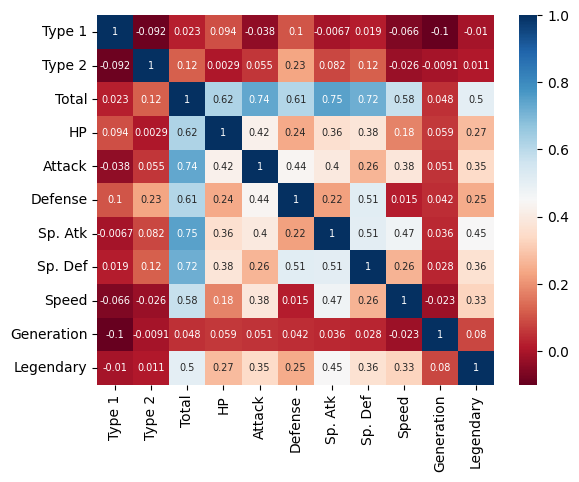

In [74]:
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', annot_kws={'fontsize':7})